# Principal Component Analysis (PCA)

Performance without PCA:
Mean Squared Error: 0.0000
R² Score: 0.9949

Performance with PCA:
Mean Squared Error: 0.0000
R² Score: 0.9958


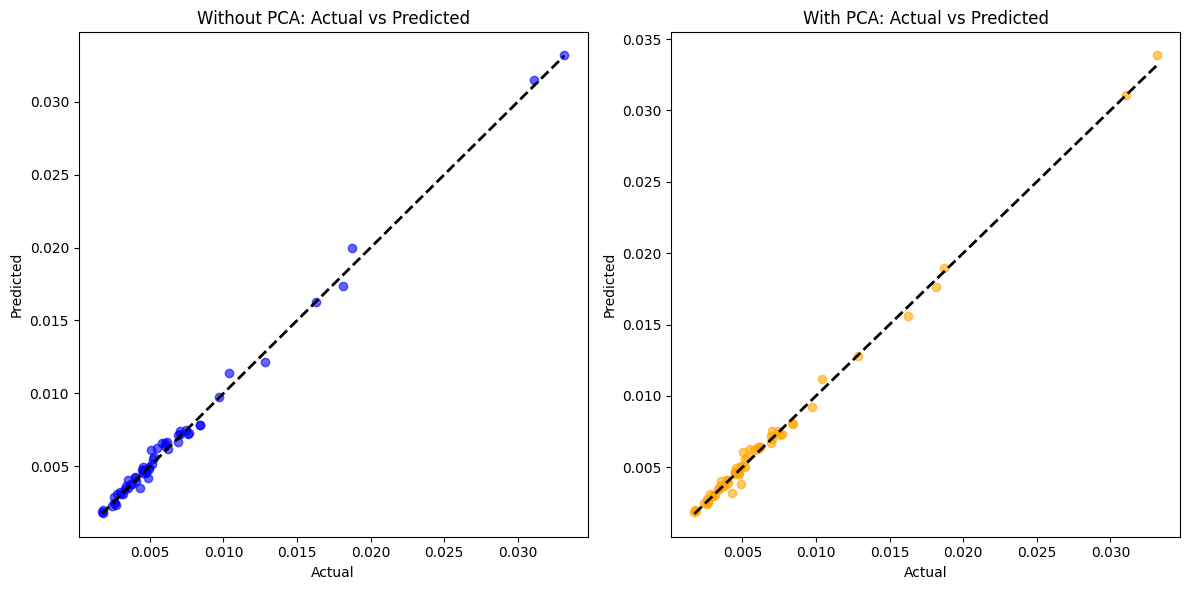

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the UCI Parkinson's dataset from a URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
data = pd.read_csv(url)

# Features (excluding 'name' and 'status', 'name' is an identifier, 'status' is for classification)
X = data.drop(columns=['name', 'status'])

# Use one of the continuous features as the target variable for regression (e.g., 'Jitter(%)')
y = X['MDVP:Jitter(%)']  # Target variable
X = X.drop(columns=['MDVP:Jitter(%)'])  # Exclude the target from the features

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Standardize the features (PCA and Linear Regression benefit from standardized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression without PCA
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_no_pca = lr.predict(X_test_scaled)

# Calculate metrics without PCA
mse_no_pca = mean_squared_error(y_test, y_pred_no_pca)
r2_no_pca = r2_score(y_test, y_pred_no_pca)

print(f"Performance without PCA:")
print(f"Mean Squared Error: {mse_no_pca:.4f}")
print(f"R² Score: {r2_no_pca:.4f}")

# Apply PCA (let's reduce to 13 principal components)
pca = PCA(n_components=13)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Linear Regression with PCA
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)

# Calculate metrics with PCA
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print(f"\nPerformance with PCA:")
print(f"Mean Squared Error: {mse_pca:.4f}")
print(f"R² Score: {r2_pca:.4f}")

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_no_pca, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Without PCA: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_pca, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('With PCA: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


# Linear Discriminant Analysis (LDA)

Accuracy without LDA: 0.7
Accuracy with LDA: 0.6166666666666667

Classification Report without LDA:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        16
           1       0.72      0.91      0.81        23
           2       0.76      0.62      0.68        21

    accuracy                           0.70        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.70      0.70      0.69        60


Classification Report with LDA:
              precision    recall  f1-score   support

           0       0.46      0.75      0.57        16
           1       0.74      0.61      0.67        23
           2       0.73      0.52      0.61        21

    accuracy                           0.62        60
   macro avg       0.64      0.63      0.62        60
weighted avg       0.66      0.62      0.62        60



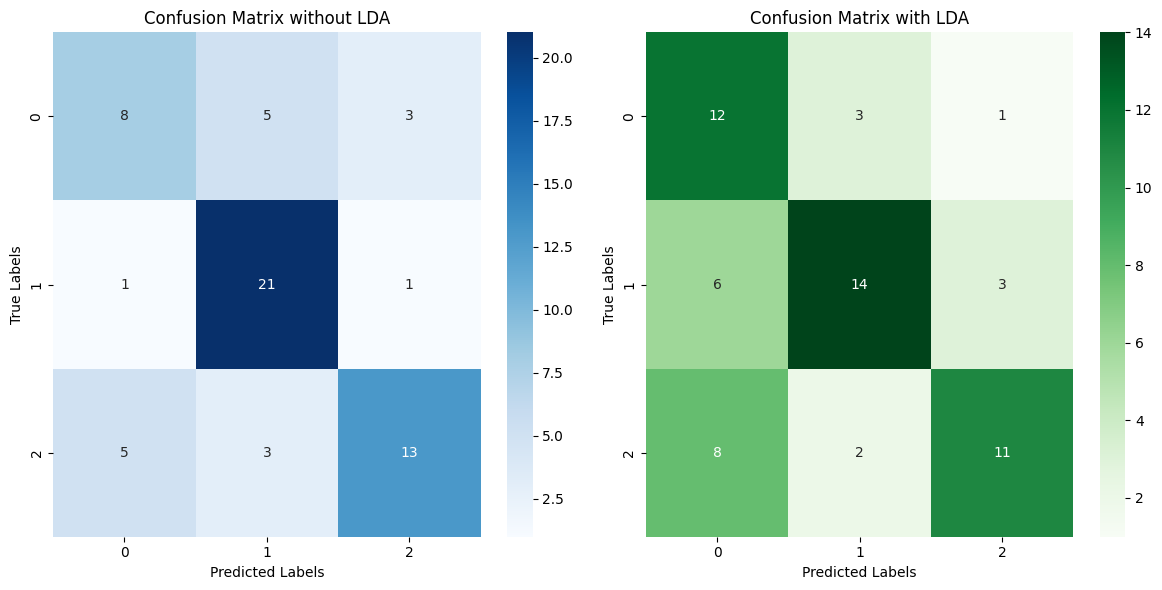

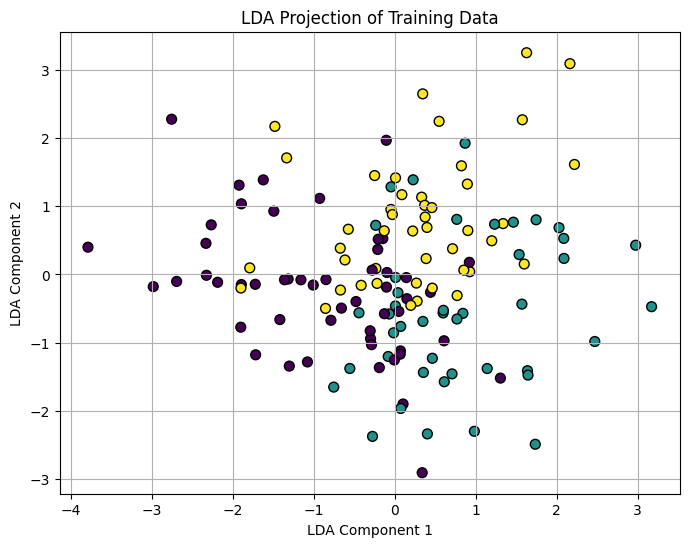

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=200, n_features=10, n_classes=3, n_informative=8, n_redundant=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree without LDA
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_no_lda = clf.predict(X_test)

# Accuracy without LDA
acc_no_lda = accuracy_score(y_test, y_pred_no_lda)

# Apply LDA
lda = LDA(n_components=2)  # Reduce to 2 components for visualization and classification
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Decision Tree with LDA
clf_lda = DecisionTreeClassifier(random_state=42)
clf_lda.fit(X_train_lda, y_train)
y_pred_lda = clf_lda.predict(X_test_lda)

# Accuracy with LDA
acc_lda = accuracy_score(y_test, y_pred_lda)

# Print the accuracy results
print("Accuracy without LDA:", acc_no_lda)
print("Accuracy with LDA:", acc_lda)

# Confusion Matrix
conf_matrix_no_lda = confusion_matrix(y_test, y_pred_no_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

# Classification Report
print("\nClassification Report without LDA:")
print(classification_report(y_test, y_pred_no_lda))

print("\nClassification Report with LDA:")
print(classification_report(y_test, y_pred_lda))

# Plot Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Without LDA Confusion Matrix
sns.heatmap(conf_matrix_no_lda, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix without LDA')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# With LDA Confusion Matrix
sns.heatmap(conf_matrix_lda, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Confusion Matrix with LDA')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

# Visualization of LDA-Transformed Data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', edgecolors='k', s=50)
plt.title('LDA Projection of Training Data')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.grid(True)
plt.show()


# Independent Component Analysis (ICA)

Silhouette Score without ICA: 0.4373
Silhouette Score with ICA: 0.5674


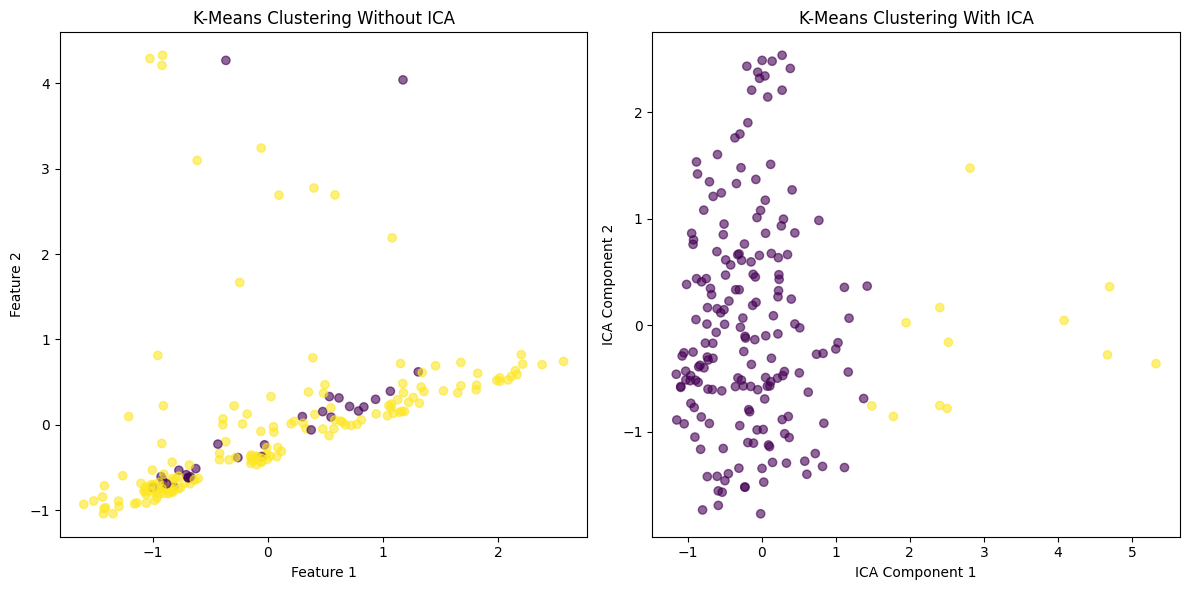

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the UCI Parkinson's dataset from a URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
data = pd.read_csv(url)


# Features (excluding 'name' and 'status')
X = data.drop(columns=['name', 'status'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering without ICA
kmeans_no_ica = KMeans(n_clusters=2, random_state=42)
kmeans_no_ica.fit(X_scaled)
labels_no_ica = kmeans_no_ica.labels_

# Evaluate clustering performance without ICA using Silhouette Score
silhouette_no_ica = silhouette_score(X_scaled, labels_no_ica)
print(f"Silhouette Score without ICA: {silhouette_no_ica:.4f}")

# Apply ICA to reduce dimensionality
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X_scaled)

# Apply K-Means clustering on ICA-transformed data
kmeans_ica = KMeans(n_clusters=2, random_state=42)
kmeans_ica.fit(X_ica)
labels_ica = kmeans_ica.labels_

# Evaluate clustering performance with ICA using Silhouette Score
silhouette_ica = silhouette_score(X_ica, labels_ica)
print(f"Silhouette Score with ICA: {silhouette_ica:.4f}")

# Visualizing the clusters before and after ICA (using the first two components)
plt.figure(figsize=(12, 6))

# Before ICA
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_no_ica, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering Without ICA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# After ICA
plt.subplot(1, 2, 2)
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=labels_ica, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering With ICA")
plt.xlabel("ICA Component 1")
plt.ylabel("ICA Component 2")

plt.tight_layout()
plt.show()


# Class Assignment

Select a suitable dataset from the UCI Machine Learning Repository (except Parkinson's dataset). Implement various dimensionality reduction techniques (such as PCA, LDA, ICA) and apply Naive Bayes as the subsequent task. Determine which dimensionality reduction technique is the most effective for this dataset, and specify the optimal number of components for that technique.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [4]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"


data = pd.read_csv(url, header=None)

In [5]:
data.isnull().sum().any()

False

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
columns = ['ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
           'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean',
           'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
           'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se',
           'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
           'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst',
           'symmetry_worst', 'fractal_dimension_worst']

data.columns = columns

In [10]:
data = data.drop(columns=['ID'])

KeyError: "['ID'] not found in axis"

In [11]:
data.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:

le = LabelEncoder()
data['Diagnosis'] = le.fit_transform(data['Diagnosis'])



In [13]:

X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Applying Guassian Naive Bayes**

In [17]:
def evaluate_naive_bayes(X_train, X_test, y_train, y_test):
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    return accuracy, confusion, class_report


**Principal Component Analysis**

In [18]:


def apply_pca(X_train, X_test, y_train, y_test, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)


    accuracy_pca, confusion_pca, report_pca = evaluate_naive_bayes(X_train_pca, X_test_pca, y_train, y_test)

    return accuracy_pca, confusion_pca, report_pca

accuracy_no_pca, confusion_no_pca, report_no_pca = evaluate_naive_bayes(X_train_scaled, X_test_scaled, y_train, y_test)


pca_accuracies = []
for n in range(1, 30):
    accuracy = apply_pca(X_train_scaled, X_test_scaled, y_train, y_test, n)[0]
    pca_accuracies.append(accuracy)

best_n_components_pca = pca_accuracies.index(max(pca_accuracies)) + 1
best_accuracy_pca = max(pca_accuracies)

print(f"Naive Bayes Accuracy without PCA: {accuracy_no_pca:.4f}")
print(f"Confusion Matrix without PCA:\n{confusion_no_pca}")
print(f"Classification Report without PCA:\n{report_no_pca}")


accuracy_pca, confusion_pca, report_pca = apply_pca(X_train_scaled, X_test_scaled, y_train, y_test, best_n_components_pca)
print(f"Naive Bayes Accuracy with PCA: {accuracy_pca:.4f}")
print(f"Confusion Matrix with PCA:\n{confusion_pca}")
print(f"Classification Report with PCA:\n{report_pca}")


Naive Bayes Accuracy without PCA: 0.9649
Confusion Matrix without PCA:
[[70  1]
 [ 3 40]]
Classification Report without PCA:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Naive Bayes Accuracy with PCA: 0.9474
Confusion Matrix with PCA:
[[70  1]
 [ 5 38]]
Classification Report with PCA:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
print(f"\nBest PCA Accuracy: {best_accuracy_pca:.4f} with {best_n_components_pca} components")


Best PCA Accuracy: 0.9474 with 2 components


**Linear Discriminant Analysis**

In [ ]:

def apply_lda(X_train, X_test, y_train, y_test):
    lda = LinearDiscriminantAnalysis(n_components=1)  # Max 1 component for binary classification
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)


    accuracy_lda, confusion_lda, report_lda = evaluate_naive_bayes(X_train_lda, X_test_lda, y_train, y_test)

    return accuracy_lda, confusion_lda, report_lda


accuracy_no_lda, confusion_no_lda, report_no_lda = evaluate_naive_bayes(X_train_scaled, X_test_scaled, y_train, y_test)


accuracy_lda, confusion_lda, report_lda = apply_lda(X_train_scaled, X_test_scaled, y_train, y_test)


max_components_lda = 1

print(f"\nNaive Bayes Accuracy without LDA: {accuracy_no_lda:.4f}")
print(f"Confusion Matrix without LDA:\n{confusion_no_lda}")
print(f"Classification Report without LDA:\n{report_no_lda}")

print(f"\nLDA Accuracy: {accuracy_lda:.4f} with {max_components_lda} component(s)")
print(f"Confusion Matrix with LDA:\n{confusion_lda}")
print(f"Classification Report with LDA:\n{report_lda}")



Naive Bayes Accuracy without LDA: 0.9649
Confusion Matrix without LDA:
[[70  1]
 [ 3 40]]
Classification Report without LDA:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


LDA Accuracy: 0.9561 with 1 component(s)
Confusion Matrix with LDA:
[[68  3]
 [ 2 41]]
Classification Report with LDA:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



**Independent Component Analysis**

In [ ]:


def apply_ica(X_train, X_test, y_train, y_test, n_components):
    ica = FastICA(n_components=n_components, random_state=42)
    X_train_ica = ica.fit_transform(X_train)
    X_test_ica = ica.transform(X_test)


    accuracy_ica, confusion_ica, report_ica = evaluate_naive_bayes(X_train_ica, X_test_ica, y_train, y_test)

    return accuracy_ica, confusion_ica, report_ica


accuracy_no_ica, confusion_no_ica, report_no_ica = evaluate_naive_bayes(X_train_scaled, X_test_scaled, y_train, y_test)


ica_accuracies = []
for n in range(1, 30):
    accuracy = apply_ica(X_train_scaled, X_test_scaled, y_train, y_test, n)[0]
    ica_accuracies.append(accuracy)

best_n_components_ica = ica_accuracies.index(max(ica_accuracies)) + 1
best_accuracy_ica = max(ica_accuracies)

print(f"\nNaive Bayes Accuracy without ICA: {accuracy_no_ica:.4f}")
print(f"Confusion Matrix without ICA:\n{confusion_no_ica}")
print(f"Classification Report without ICA:\n{report_no_ica}")

accuracy_ica, confusion_ica, report_ica = apply_ica(X_train_scaled, X_test_scaled, y_train, y_test, best_n_components_ica)
print(f"Naive Bayes Accuracy with ICA: {accuracy_ica:.4f}")
print(f"Confusion Matrix with ICA:\n{confusion_ica}")
print(f"Classification Report with ICA:\n{report_ica}")



Naive Bayes Accuracy without ICA: 0.9649
Confusion Matrix without ICA:
[[70  1]
 [ 3 40]]
Classification Report without ICA:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Naive Bayes Accuracy with ICA: 0.9386
Confusion Matrix with ICA:
[[69  2]
 [ 5 38]]
Classification Report with ICA:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
print(f"\nBest ICA Accuracy: {best_accuracy_ica:.4f} with {best_n_components_ica} components")


Best ICA Accuracy: 0.9386 with 3 components


**Comparison of Dimensionality Reduction Techniques**

In [ ]:
print(f"Comparison of Dimensionality Reduction Techniques:")
print(f"PCA: {best_accuracy_pca:.4f} with {best_n_components_pca} components")
print(f"LDA: {accuracy_lda:.4f} with {max_components_lda} components")
print(f"ICA: {best_accuracy_ica:.4f} with {best_n_components_ica} components")


Comparison of Dimensionality Reduction Techniques:
PCA: 0.9474 with 2 components
LDA: 0.9561 with 1 components
ICA: 0.9386 with 3 components
